In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.test.is_built_with_cuda()

True

In [4]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 308s 2us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [6]:
y_train.shape

(50000, 1)

In [7]:
x_test.shape

(10000, 32, 32, 3)

In [8]:
y_test.shape

(10000, 1)

In [17]:
def plot(x):
    plt.figure(figsize = (10,3))
    plt.imshow(x_train[x])

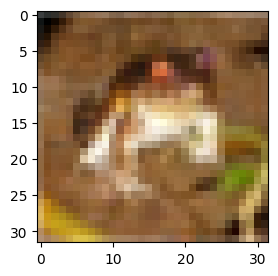

In [18]:
plot(0)

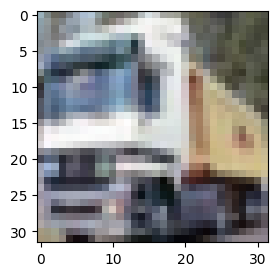

In [19]:
plot(1)

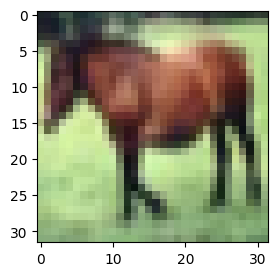

In [21]:
plot(7)

In [23]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [24]:
classes[y_train[7][0]]

'horse'

In [26]:
# normalizing data
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [27]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [28]:
x_test_scaled.shape

(10000, 32, 32, 3)

In [29]:
# converting y_train label to one_hot_encoding
y_train_categorical = keras.utils.to_categorical(
    y_train,num_classes=10, dtype = 'float32')

In [30]:
y_train_categorical

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [31]:
y_train_categorical.shape

(50000, 10)

In [32]:
y_test_categorical = keras.utils.to_categorical(
    y_test,num_classes = 10, dtype = 'float32')

In [33]:
# building model

In [34]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3500,activation = 'relu'),
    keras.layers.Dense(1200,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])

In [35]:
model.compile(optimizer = 'SGD',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [37]:
model.fit(x_train_scaled,y_train_categorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.8060 - accuracy: 0.3575
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.6194 - accuracy: 0.4289
Epoch 3/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.5376 - accuracy: 0.4593
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4766 - accuracy: 0.4821
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.4276 - accuracy: 0.4968
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3830 - accuracy: 0.5136
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3466 - accuracy: 0.5262
Epoch 8/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3100 - accuracy: 0.5403
Epoch 9/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2764 - accuracy: 0.5526
Epoch 10/50
1563/1563 [==============================] - 10s 7ms/step - l

In [38]:
model.evaluate(x_train_scaled,y_train_categorical)

1563/1563 [==============================] - 7s 5ms/step - loss: 0.2497 - accuracy: 0.9278


[0.24968434870243073, 0.927839994430542]

In [42]:
classes[np.argmax(model.predict(x_test_scaled)[1])]

313/313 [==============================] - 1s 2ms/step


'ship'

In [44]:
classes[y_test[1][0]]

'ship'

In [49]:
import joblib

In [50]:
joblib.dump(model, 'model.pkl')

INFO:tensorflow:Assets written to: ram://37191a62-5ef0-4f18-bc17-1d32f8337171/assets


['model.pkl']

In [55]:
# by default prior model was trained on gpu

In [51]:
# performance test on cpu & gpu

In [52]:
def model():
    model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3500,activation = 'relu'),
    keras.layers.Dense(1200,activation = 'relu'),
    keras.layers.Dense(10,activation = 'sigmoid')
])
    model.compile(optimizer = 'SGD',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
    return model

In [54]:
with tf.device('/CPU:0'):
    cpu_model = model()
    cpu_model.fit(x_train_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 107s 68ms/step - loss: 1.8080 - accuracy: 0.3567


In [56]:
with tf.device('/GPU:0'):
    gpu_model = model()
    gpu_model.fit(x_train_scaled,y_train_categorical,epochs=1)

1563/1563 [==============================] - 10s 6ms/step - loss: 1.8114 - accuracy: 0.3560


In [57]:
# you can see the difference between 107s and 10s